<a href="https://colab.research.google.com/github/esgiraldop/machine-learning/blob/master/Tarea2/Tarea2_Feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocesamiento

In [0]:
#To mount drive for workspace. 
from google.colab import drive

#This will prompt for authorization.
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
"""Objective: To apply filter selection to a dataset
            of computer hardware performance in order to boost trainig time
"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from mpl_toolkits.mplot3d import Axes3D  # importing the packege for 3D plots
from sklearn import decomposition # importing the pca package

"""COLUM NAMES
1. Vendor name: 30 
      (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
       dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
       microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
       sratus, wang)
2. Model Name: many unique symbols
3. MYCT: Machine cycle time [nanoseconds]
4. MMIN: Minimum main memory [kilobytes]
5. MMAX: Maximum main memory [kilobytes]
6. CACH: Cache memory [kilobytes]
7. CHMIN: minimum channels [units]
8. CHMAX: maximum channels [units]
9. PRP: published relative performance
10. ERP: estimated relative performance from the original article"""

'COLUM NAMES\n1. Vendor name: 30 \n      (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, \n       dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, \n       microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, \n       sratus, wang)\n2. Model Name: many unique symbols\n3. MYCT: Machine cycle time [nanoseconds]\n4. MMIN: Minimum main memory [kilobytes]\n5. MMAX: Maximum main memory [kilobytes]\n6. CACH: Cache memory [kilobytes]\n7. CHMIN: minimum channels [units]\n8. CHMAX: maximum channels [units]\n9. PRP: published relative performance\n10. ERP: estimated relative performance from the original article'

In [0]:
path_to_datos = '/content/drive/My Drive/CursoMLAvanzado/Estudiantes/Luis-Vesga-Erick-Giraldo/Tarea 2/machine.csv';

cpuData = pd.read_csv(path_to_datos, header = None, sep = ',', 
                         names = ['vendorName','modelName','MYCT',
                                  'MMIN','MMAX','CACH','CHMIN','CHMAX','PRP',
                                  'ERP'])
cpuData.info()
cpuData.describe(include='O')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   vendorName  209 non-null    object
 1   modelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


,vendorName,modelName
count,209,209
unique,30,209
top,ibm,50-2250
freq,32,1


In [0]:
cpuData.head(10)

,vendorName,modelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
5,amdahl,470v/b,26,8000,32000,64,8,32,318,290
6,amdahl,580-5840,23,16000,32000,64,16,32,367,381
7,amdahl,580-5850,23,16000,32000,64,16,32,489,381
8,amdahl,580-5860,23,16000,64000,64,16,32,636,749
9,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238


In [0]:
#Copying ERP colum into a seperate dataframe
data_ERP =  cpuData[cpuData.columns[-1]]
data_ERP.head()
#Dropping ERP column
cpuData = cpuData.drop(['ERP'], axis=1)

In [0]:
# Encoding of categorical data.
cpuData["vendorName"] = cpuData["vendorName"].astype('category').cat.codes
cpuData["modelName"] = cpuData["modelName"].astype('category').cat.codes

In [0]:
cpuData.head(10)

,vendorName,modelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,0,29,125,256,6000,256,16,128,198
1,1,62,29,8000,32000,32,8,32,269
2,1,63,29,8000,32000,32,8,32,220
3,1,64,29,8000,32000,32,8,32,172
4,1,65,29,8000,16000,32,8,16,132
5,1,66,26,8000,32000,64,8,32,318
6,1,74,23,16000,32000,64,16,32,367
7,1,75,23,16000,32000,64,16,32,489
8,1,76,23,16000,64000,64,16,32,636
9,1,77,23,32000,64000,128,32,64,1144


In [0]:
(cpuData[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']]).apply(lambda column: (column<= 0).sum())

MYCT      0
MMIN      0
MMAX      0
CACH     69
CHMIN     5
CHMAX     5
PRP       0
dtype: int64

In [0]:
cpuData['CACH'] = cpuData['CACH']+1
cpuData['CHMIN'] = cpuData['CHMIN']+1
cpuData['CHMAX'] = cpuData['CHMAX'] +1
(cpuData[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']]).apply(lambda column: (column<= 0).sum())

MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
PRP      0
dtype: int64

In [0]:
cpuDataSt = np.log(cpuData[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']])
cpuDataSt['vendorName'] = cpuData['vendorName']
cpuDataSt['modelName'] = cpuData['modelName']

In [0]:
cpuDataSt.head(10)

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,vendorName,modelName
0,4.828314,5.545177,8.699515,5.549076,2.833213,4.859812,5.288267,0,29
1,3.367296,8.987197,10.373491,3.496508,2.197225,3.496508,5.594711,1,62
2,3.367296,8.987197,10.373491,3.496508,2.197225,3.496508,5.393628,1,63
3,3.367296,8.987197,10.373491,3.496508,2.197225,3.496508,5.147494,1,64
4,3.367296,8.987197,9.680344,3.496508,2.197225,2.833213,4.882802,1,65
5,3.258097,8.987197,10.373491,4.174387,2.197225,3.496508,5.762051,1,66
6,3.135494,9.680344,10.373491,4.174387,2.833213,3.496508,5.905362,1,74
7,3.135494,9.680344,10.373491,4.174387,2.833213,3.496508,6.192362,1,75
8,3.135494,9.680344,11.066638,4.174387,2.833213,3.496508,6.455199,1,76
9,3.135494,10.373491,11.066638,4.859812,3.496508,4.174387,7.042286,1,77


In [0]:
#  X and Y DataFrames.
X = cpuDataSt.drop(['PRP'], axis=1)
Y = cpuDataSt['PRP']

In [0]:
X.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,vendorName,modelName
0,4.828314,5.545177,8.699515,5.549076,2.833213,4.859812,0,29
1,3.367296,8.987197,10.373491,3.496508,2.197225,3.496508,1,62
2,3.367296,8.987197,10.373491,3.496508,2.197225,3.496508,1,63
3,3.367296,8.987197,10.373491,3.496508,2.197225,3.496508,1,64
4,3.367296,8.987197,9.680344,3.496508,2.197225,2.833213,1,65


In [0]:
# Data split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [0]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predictions = clf.predict(X_test)
errors = mean_squared_error(y_test, predictions)
# Print out the mean square error (mse)
print('Mean square Error:', round(errors, 6))

Mean square Error: 0.27114


In [0]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [0]:
predictions = rf.predict(X_test)
errors = mean_squared_error(y_test, predictions)
# Print out the mean square error (mse)
print('Mean square Error:', round(errors, 6))

## A partir de este punto seguiremos usando el metodo de random forest ya que nos dio mejores resultados.

Mean square Error: 0.22102


# Metodo de filtrado

### 1. Se eliminan las columnas con baja correlación con PRP

In [0]:
cpuDataSt.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,vendorName,modelName
0,4.828314,5.545177,8.699515,5.549076,2.833213,4.859812,5.288267,0,29
1,3.367296,8.987197,10.373491,3.496508,2.197225,3.496508,5.594711,1,62
2,3.367296,8.987197,10.373491,3.496508,2.197225,3.496508,5.393628,1,63
3,3.367296,8.987197,10.373491,3.496508,2.197225,3.496508,5.147494,1,64
4,3.367296,8.987197,9.680344,3.496508,2.197225,2.833213,4.882802,1,65


In [0]:
importances = cpuDataSt.drop('PRP', axis=1).apply(lambda x: x.corr(cpuDataSt.PRP))
indices = np.argsort(importances)
print(importances[indices])

MYCT         -0.701793
modelName    -0.144549
vendorName   -0.036779
CHMAX         0.640541
CHMIN         0.672698
MMIN          0.764386
CACH          0.767503
MMAX          0.796814
dtype: float64


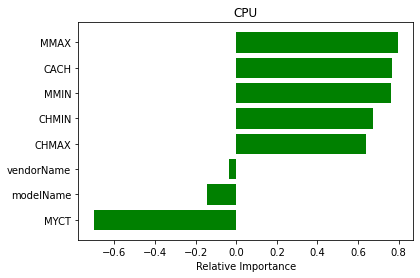

In [0]:
names=['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','vendorName','modelName']
plt.title('CPU')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

En este paso eliminaremos las caracteristicas con una correlación menor al 0.4 con la caracteristica PRP.

In [0]:
for i in range(0, len(indices)):
    if np.abs(importances[i])<=0.4:
        print(names[i])

vendorName
modelName


In [0]:
X_train2 = X_train.drop(['vendorName','modelName'], axis=1)
X_test2 = X_test.drop(['vendorName','modelName'], axis=1)

In [0]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train2, y_train);

In [0]:
predictions = rf.predict(X_test2)
errors = mean_squared_error(y_test, predictions)
# Print out the mean square error (mse)
print('Mean square Error:', round(errors, 6))

Mean square Error: 0.225893


vendorName y modelName aunque tiene baja correlación no se deben eliminar, ya que estos son categoricos con encoding y no se pasaron los la transformación logistica. Pero como podemos observar en el paso anterior, si las eliminamos nuestra metrica empeora.

## 2. Se eliminan las caracteristicas con alta correlación entre ellas.

No se tiene en cuenta la variable objetivo en este analisis. Se eliminara una de las caracteristicas que tenga una correlación con otra mayor a 0.7.


In [0]:
cpuDataSt.drop(['PRP'],axis=1).corr()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,vendorName,modelName
MYCT,1.000000,-0.729408,-0.633149,-0.617089,-0.617906,-0.550792,-0.054165,0.114833
MMIN,-0.729408,1.000000,0.733282,0.600697,0.570907,0.442000,0.095862,-0.113761
MMAX,-0.633149,0.733282,1.000000,0.616292,0.485568,0.512799,0.057055,-0.046983
CACH,-0.617089,0.600697,0.616292,1.000000,0.522014,0.491165,0.028518,-0.046476
CHMIN,-0.617906,0.570907,0.485568,0.522014,1.000000,0.709801,-0.044219,-0.247866
CHMAX,-0.550792,0.442000,0.512799,0.491165,0.709801,1.000000,-0.080825,-0.154441
vendorName,-0.054165,0.095862,0.057055,0.028518,-0.044219,-0.080825,1.000000,-0.127345
modelName,0.114833,-0.113761,-0.046983,-0.046476,-0.247866,-0.154441,-0.127345,1.000000


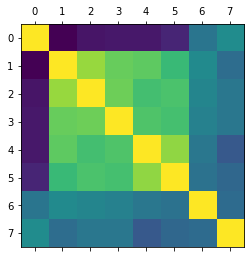

In [0]:
plt.matshow(cpuDataSt.drop(['PRP'],axis=1).corr())
plt.show()

In [0]:
X_train2 = X_train.drop(['MMIN'], axis=1)
X_test2 = X_test.drop(['MMIN'], axis=1)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train2, y_train);
predictions = rf.predict(X_test2)
errors = mean_squared_error(y_test, predictions)
# Print out the mean square error (mse)
print('Mean square Error:', round(errors, 6))

Mean square Error: 0.221676


In [0]:
X_train2 = X_train.drop(['MMAX'], axis=1)
X_test2 = X_test.drop(['MMAX'], axis=1)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train2, y_train);
predictions = rf.predict(X_test2)
errors = mean_squared_error(y_test, predictions)
# Print out the mean square error (mse)
print('Mean square Error:', round(errors, 6))

Mean square Error: 0.250724


In [0]:
X_train2 = X_train.drop(['CHMIN'], axis=1)
X_test2 = X_test.drop(['CHMIN'], axis=1)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train2, y_train);
predictions = rf.predict(X_test2)
errors = mean_squared_error(y_test, predictions)
# Print out the mean square error (mse)
print('Mean square Error:', round(errors, 6))

Mean square Error: 0.210623


In [0]:
X_train2 = X_train.drop(['CHMAX'], axis=1)
X_test2 = X_test.drop(['CHMAX'], axis=1)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train2, y_train);
predictions = rf.predict(X_test2)
errors = mean_squared_error(y_test, predictions)
# Print out the mean square error (mse)
print('Mean square Error:', round(errors, 6))

Mean square Error: 0.224907


In [0]:
X_train2 = X_train.drop(['MMIN','CHMIN'], axis=1)
X_test2 = X_test.drop(['MMIN','CHMIN'], axis=1)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train2, y_train);
predictions = rf.predict(X_test2)
errors = mean_squared_error(y_test, predictions)
# Print out the mean square error (mse)
print('Mean square Error:', round(errors, 6))

Mean square Error: 0.210892


In [0]:
X_train2 = X_train.drop(['MMIN','CHMAX'], axis=1)
X_test2 = X_test.drop(['MMIN','CHMAX'], axis=1)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train2, y_train);
predictions = rf.predict(X_test2)
errors = mean_squared_error(y_test, predictions)
# Print out the mean square error (mse)
print('Mean square Error:', round(errors, 6))

Mean square Error: 0.230569


In [0]:
X_train2 = X_train.drop(['MMAX','CHMIN'], axis=1)
X_test2 = X_test.drop(['MMAX','CHMIN'], axis=1)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train2, y_train);
predictions = rf.predict(X_test2)
errors = mean_squared_error(y_test, predictions)
# Print out the mean square error (mse)
print('Mean square Error:', round(errors, 6))

Mean square Error: 0.243381


In [0]:
X_train2 = X_train.drop(['MMAX','CHMAX'], axis=1)
X_test2 = X_test.drop(['MMAX','CHMAX'], axis=1)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train2, y_train);
predictions = rf.predict(X_test2)
errors = mean_squared_error(y_test, predictions)
# Print out the mean square error (mse)
print('Mean square Error:', round(errors, 6))

Mean square Error: 0.273443


In [0]:
cpuDataSt = cpuDataSt.drop(['MMIN','CHMIN'], axis=1)

In [0]:
cpuDataSt.head()

,MYCT,MMAX,CACH,CHMAX,PRP,vendorName,modelName
0,4.828314,8.699515,5.549076,4.859812,5.288267,0,29
1,3.367296,10.373491,3.496508,3.496508,5.594711,1,62
2,3.367296,10.373491,3.496508,3.496508,5.393628,1,63
3,3.367296,10.373491,3.496508,3.496508,5.147494,1,64
4,3.367296,9.680344,3.496508,2.833213,4.882802,1,65


In [0]:
cpuDataSt['PRP']

0      5.288267
1      5.594711
2      5.393628
3      5.147494
4      4.882802
         ...   
204    3.737670
205    3.828641
206    3.951244
207    4.204693
208    3.806662
Name: PRP, Length: 209, dtype: float64

Luego de aplicar el metodo de emboltura se tomo la decisión de eliminar las caracteriticas MMIN y CHMIN. Aunque eliminando solo CHMIN tenemos un mejor MSE, para simplificar el modelo decidimos eliminar ambas caracteristicas.

## 3.  Infromación mutua respecto a Y


In [0]:
from sklearn.feature_selection import mutual_info_regression

In [0]:
mi = mutual_info_regression(cpuDataSt.drop(['PRP'], axis=1), cpuDataSt['PRP'])
c2 = cpuDataSt.drop(['PRP'], axis=1)

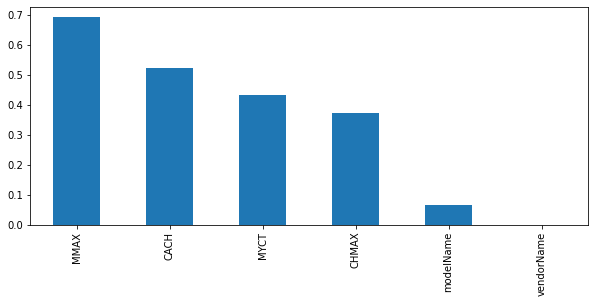

In [0]:
mi = pd.Series(mi)
mi.index = c2.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))

Se pueba a eliminar la variable vendorName

In [0]:
X_train2 = X_train.drop(['modelName','MMIN','CHMIN'], axis=1)
X_test2 = X_test.drop(['modelName','MMIN','CHMIN'], axis=1)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train2, y_train);
predictions = rf.predict(X_test2)
errors = mean_squared_error(y_test, predictions)
# Print out the mean square error (mse)
print('Mean square Error:', round(errors, 6))

Mean square Error: 0.213947


In [0]:
X_train2 = X_train.drop(['vendorName','MMIN','CHMIN'], axis=1)
X_test2 = X_test.drop(['vendorName','MMIN','CHMIN'], axis=1)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train2, y_train);
predictions = rf.predict(X_test2)
errors = mean_squared_error(y_test, predictions)
# Print out the mean square error (mse)
print('Mean square Error:', round(errors, 6))

Mean square Error: 0.211191


Se decide no eliminar vendorName, ni modelName por que al probar el modelo con este cambio, sube el MSE. Por lo tanto las caracteriticas finales son:



1.   MYCT
2.   MMAX
3.   CACH
4.   CHMAX
5.   VendorName
6.   modelName



In [0]:
X_train2 = X_train.drop(['MMIN','CHMIN'], axis=1)
X_test2 = X_test.drop(['MMIN','CHMIN'], axis=1)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train2, y_train);
predictions = rf.predict(X_test2)
errors = mean_squared_error(y_test, predictions)
# Print out the mean square error (mse)
print('Mean square Error:', round(errors, 6))

Mean square Error: 0.210892


# Selección de catacteristicas usando Random Forest Regressor

Se usará un modelo random Forest regressor para identificar cuales son las variables a las que menos peso se da, luego se elimiaran dichas variables y se probara el beneficio del modelo usando el metodo de envoltura. Dejaremos las variables categoricas por fuera de este analisis por las razones explicadas anteriormente.

In [0]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);
predictions = rf.predict(X_test)
errors = mean_squared_error(y_test, predictions)
# Print out the mean square error (mse)
print('Mean square Error:', round(errors, 6))
print(X_train.columns)
print(rf.feature_importances_)

Mean square Error: 0.22102
Index(['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'vendorName',
       'modelName'],
      dtype='object')
[0.0300286  0.04595158 0.26393543 0.47801058 0.0521388  0.08336186
 0.01479045 0.03178271]


In [0]:
X_train2 = X_train.drop(['MYCT'], axis=1)
X_test2 = X_test.drop(['MYCT'], axis=1)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train2, y_train);
predictions = rf.predict(X_test2)
errors = mean_squared_error(y_test, predictions)
# Print out the mean square error (mse)
print('Mean square Error:', round(errors, 6))
print(X_train2.columns)
print(rf.feature_importances_)

Mean square Error: 0.214816
Index(['MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'vendorName', 'modelName'], dtype='object')
[0.05178876 0.26790231 0.48060454 0.05500355 0.08893614 0.0185853
 0.03717939]


In [0]:
X_train2 = X_train.drop(['MYCT','MMIN'], axis=1)
X_test2 = X_test.drop(['MYCT','MMIN'], axis=1)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train2, y_train);
predictions = rf.predict(X_test2)
errors = mean_squared_error(y_test, predictions)
# Print out the mean square error (mse)
print('Mean square Error:', round(errors, 6))
print(X_train2.columns)
print(rf.feature_importances_)

Al eliminar la variable MMIN nuestro modelo empeora en rendimiento por lo tanto procedemos a dejar MMIN y quitar CHMIN.

In [0]:
X_train2 = X_train.drop(['MYCT','CHMIN'], axis=1)
X_test2 = X_test.drop(['MYCT','CHMIN'], axis=1)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train2, y_train);
predictions = rf.predict(X_test2)
errors = mean_squared_error(y_test, predictions)
# Print out the mean square error (mse)
print('Mean square Error:', round(errors, 6))
print(X_train2.columns)
print(rf.feature_importances_)

Mean square Error: 0.1993
Index(['MMIN', 'MMAX', 'CACH', 'CHMAX', 'vendorName', 'modelName'], dtype='object')
[0.06540613 0.2788345  0.48981192 0.10274826 0.01990156 0.04329762]
